In [1]:
import os
os.chdir(os.pardir)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.patches as mpatches
import pandas as pd

import vapor
from vapor.models import Cambium

2021-01-21 13:30:59,468 [MainThread  ] [INFO ]  Starting log for vapor...


In [8]:

dfs = []

# --- Define Optimization Variables ---
aggregate_region = 'pca'
opt_vars = ['project_return_aftertax_npv']#['marginal_cost_mwh']
scenarios = ['StdScen20_HighRECost', 'StdScen20_LowRECost', 'StdScen20_MidCase']
techs = ['pv', 'wind']
batt_sizes = [0., 25., 100.]
batt_durations = [4.]

for opt_var in opt_vars:
    for scenario in scenarios:
        for tech in techs:
            for batt_size in batt_sizes:
                for batt_duration in batt_durations:
                    file = f"{aggregate_region}_best_{tech}_{scenario}_{opt_var}_batt_{batt_size}_{batt_duration}.pkl"
                    fp = os.path.join('results',file)
                    dfs.append(pd.read_pickle(fp))


results = pd.concat(dfs, axis='rows')
results.reset_index(drop=True, inplace=True)

# --- Map on States ---
hierarchy = pd.read_csv(os.path.join('data','geography','region_hierarchy.csv'))
hierarchy.rename({'pca':'region'}, axis='columns', inplace=True)
df = results.merge(hierarchy[['region','state']], on='region', how='left')
                        
# --- Sort Systems to Keep best by State ---
df.sort_values(opt_vars[0], inplace=True)
# df.drop_duplicates(['scenario','state','tech','batt_size'], inplace=True) #keep best performing system by region/scenario

# --- Create Viz object ---
Viz = vapor.Visualizer(results=df, aggregate_region=aggregate_region, region_label_pct=0.75)
plot_df = Viz.gdf
plot_df.head()

region                                           geometry  \
0     p1  MULTIPOLYGON (((-122.46308 47.50841, -122.4623...   
1     p1  MULTIPOLYGON (((-122.46308 47.50841, -122.4623...   
2     p1  MULTIPOLYGON (((-122.46308 47.50841, -122.4623...   
3     p1  MULTIPOLYGON (((-122.46308 47.50841, -122.4623...   
4     p1  MULTIPOLYGON (((-122.46308 47.50841, -122.4623...   

   adjusted_installed_cost  analysis_period_irr  cash_for_debt_service  \
0             2.985695e+08                  NaN          -1.665946e+08   
1             2.985695e+08                  NaN          -1.665946e+08   
2             2.985695e+08                  NaN          -1.665946e+08   
3             2.985695e+08                  NaN          -1.643973e+08   
4             2.985695e+08                  NaN          -1.643973e+08   

   cbi_fedtax_total  cbi_statax_total  cbi_total  cbi_total_fed  \
0               0.0               0.0        0.0            0.0   
1               0.0               0.0        0.0            0.0   
2               0.0               0.0        0.0            0.0   
3               0.0               0.0        0.0            0.0   
4               0.0               0.0        0.0            0.0   

   cbi_total_oth  ...  cutoff_losses  elec_losses  env_losses  ops_losses  \
0            0.0  ...            0.0      2.00809    5.578702    2.803467   
1            0.0  ...            0.0      2.00809    5.578702    2.803467   
2            0.0  ...            0.0      2.00809    5.578702    2.803467   
3            0.0  ...            0.0      2.00809    5.578702    2.803467   
4            0.0  ...            0.0      2.00809    5.578702    2.803467   

   turb_losses  wake_losses  wind_speed_average  turbine_class  \
0     3.954496     5.448311            3.587095            4.0   
1     3.954496     5.448311            3.587095            4.0   
2     3.954496     5.448311            3.587095            4.0   
3     3.954496     5.448311            3.587095            4.0   
4     3.954496     5.448311            3.587095            4.0   

   wind_turbine_hub_ht  state  
0           139.235694     WA  
1           139.235694     WA  
2           139.235694     WA  
3           139.235694     WA  
4           139.235694     WA  

[5 rows x 622 columns]

In [6]:
# for i in plot_df.columns:
#     if 'grid_value' in i:
#         print(i)

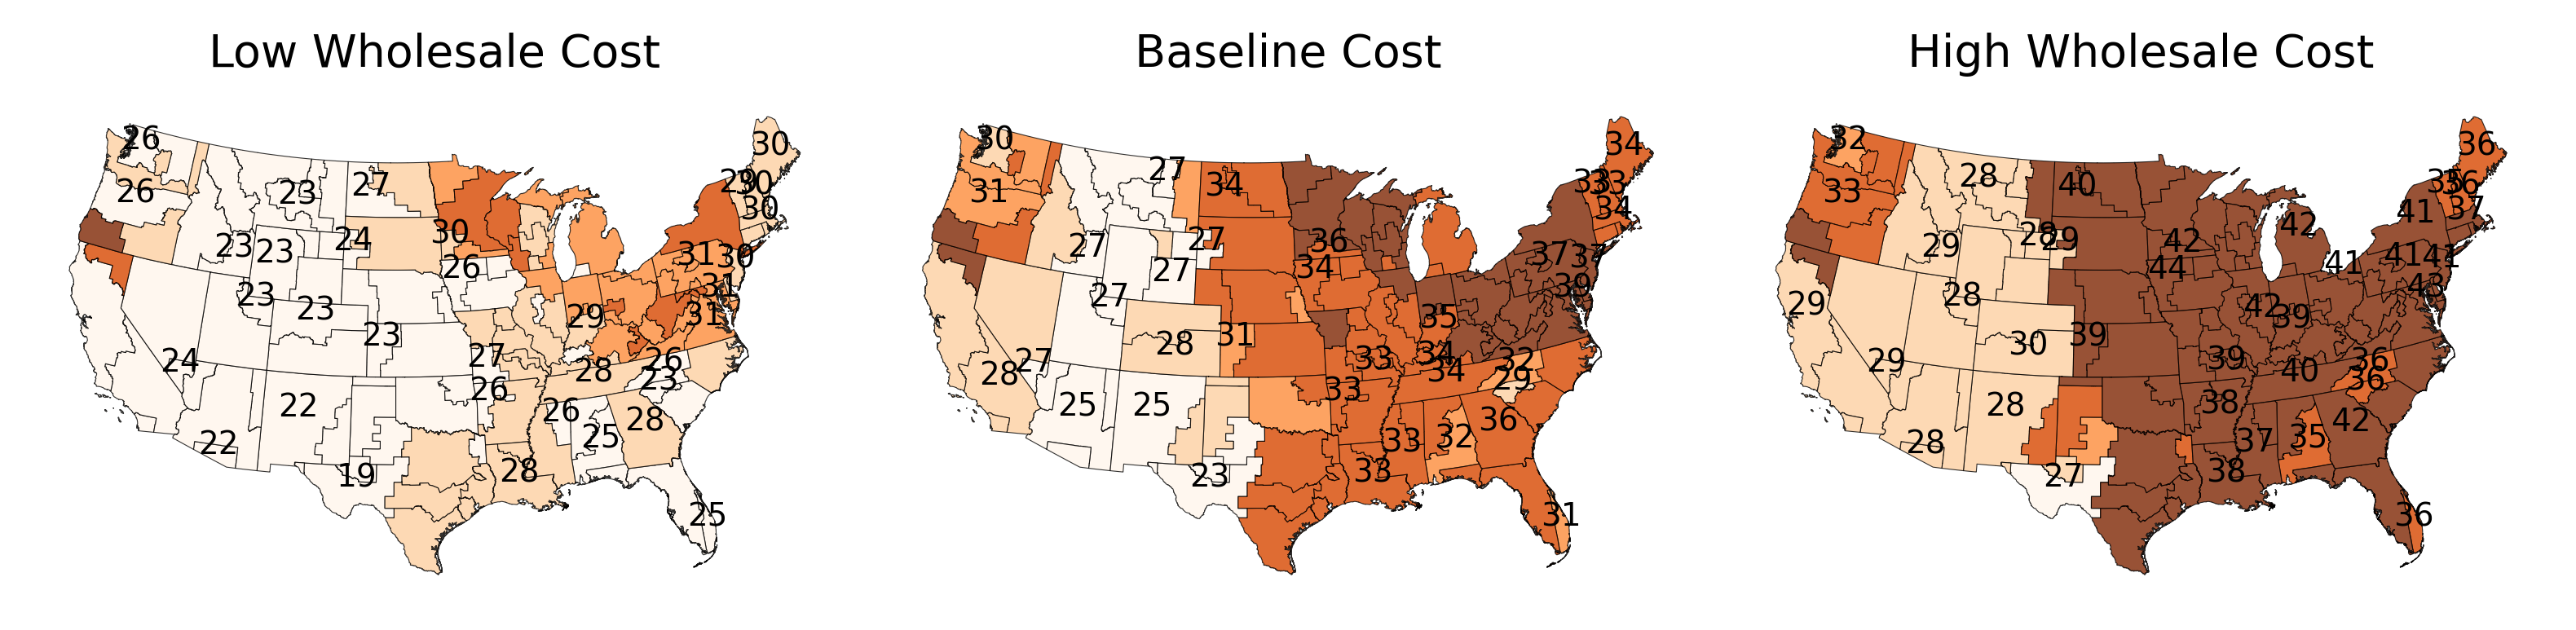

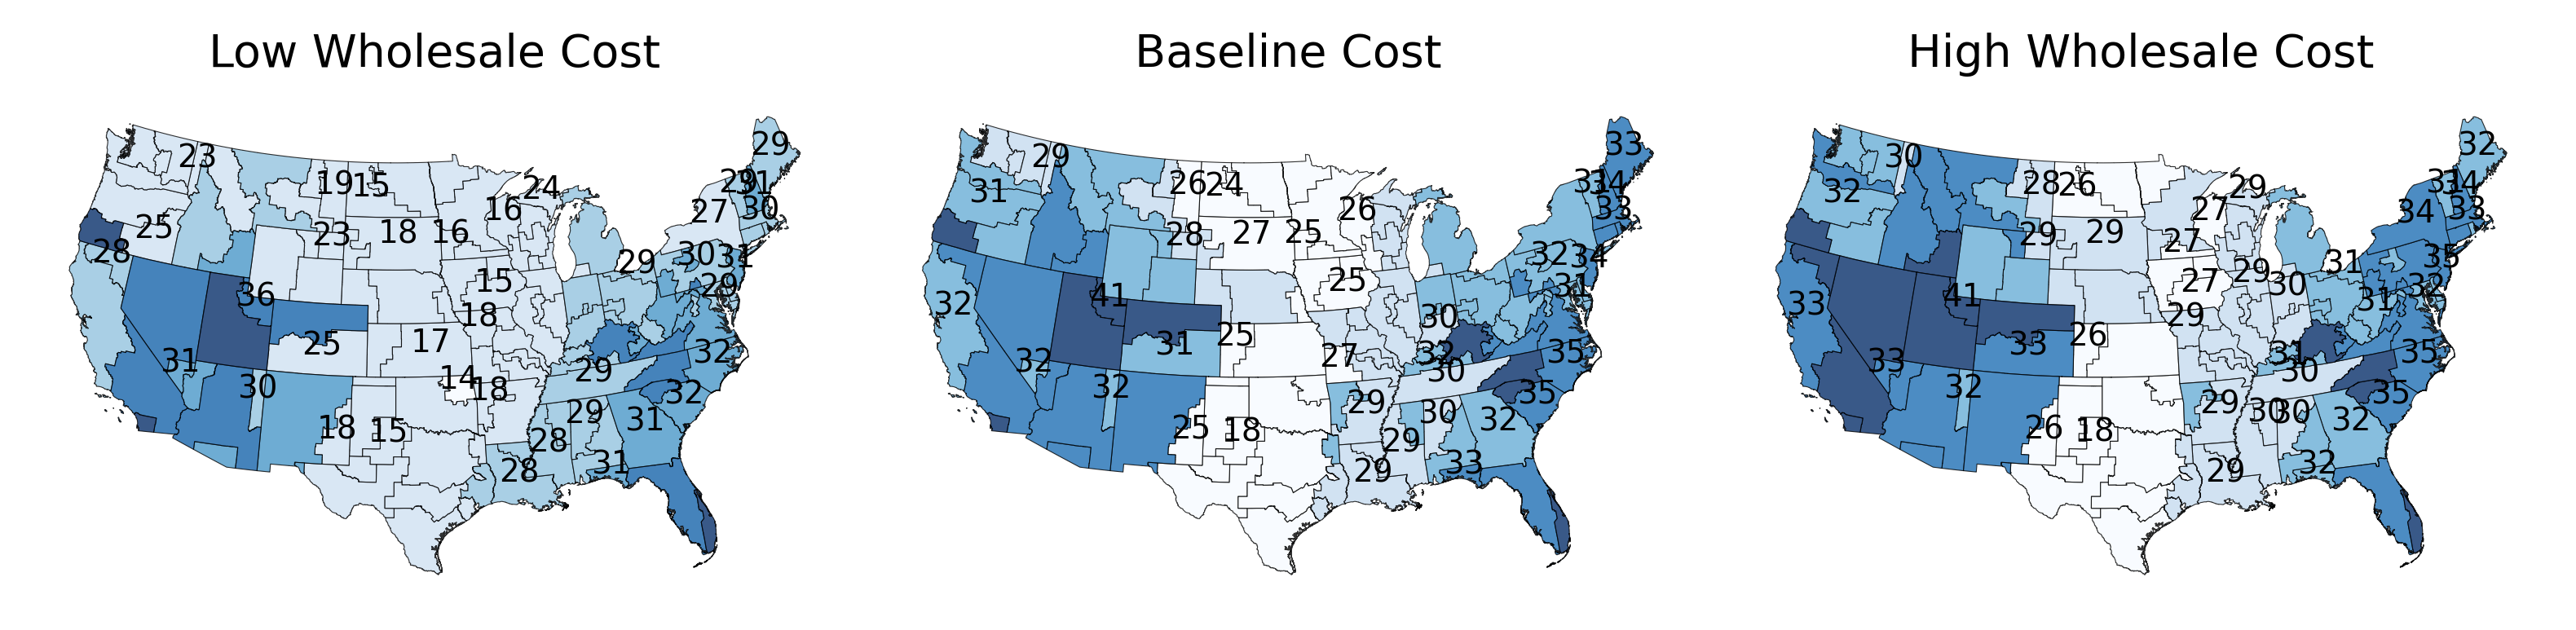

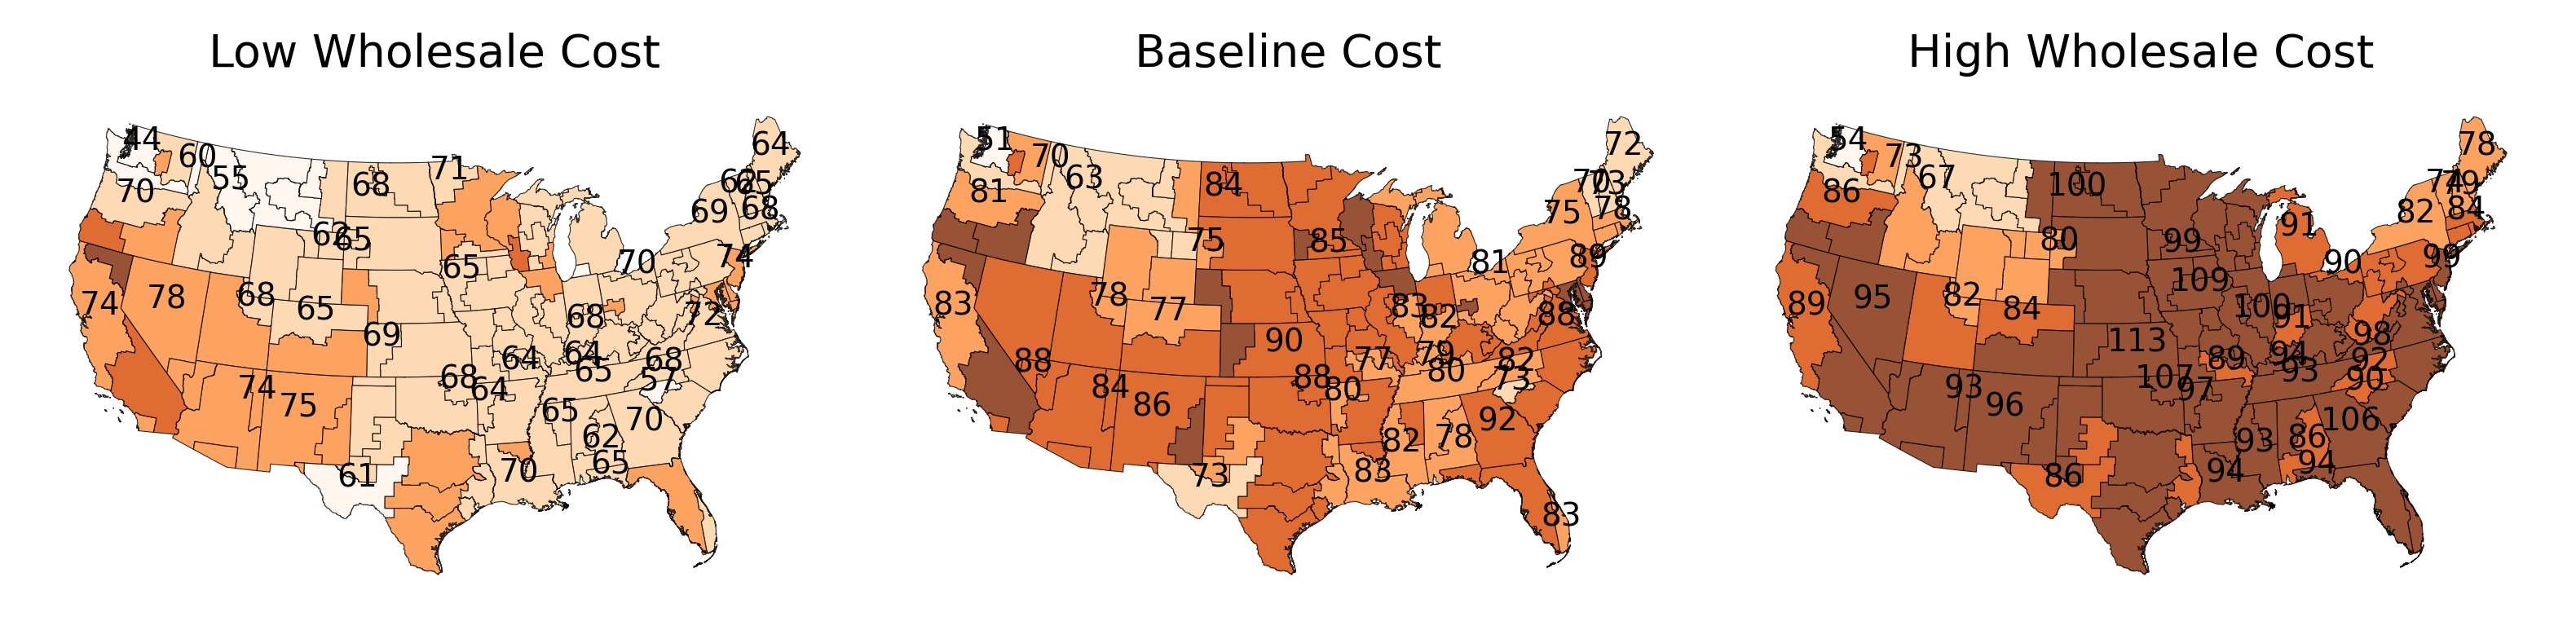

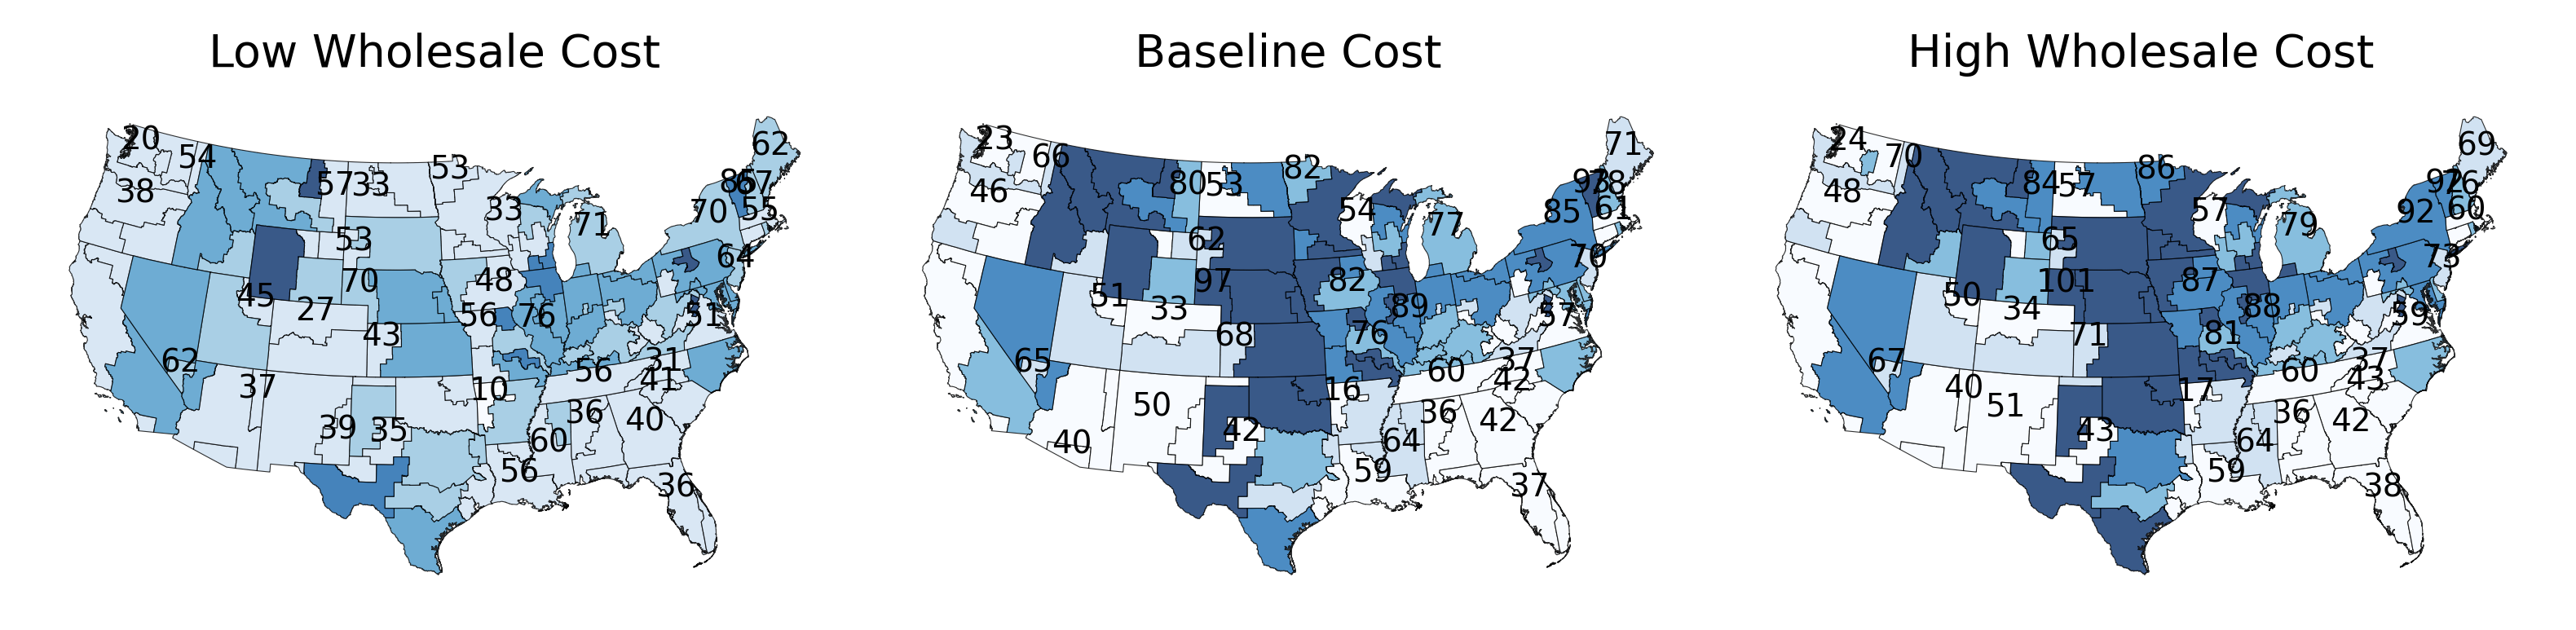

In [3]:
# --- Choropleths ---

Viz.triple_choropleth(column='grid_value_per_mwh',
               tech='pv', region_label_pct=0.25,
               ascending=True, reverse_cmap=False)

Viz.triple_choropleth(column='grid_value_per_mwh',
               tech='wind', region_label_pct=0.25,
               ascending=True, reverse_cmap=False)

Viz.triple_choropleth(column='lifetime_cambium_grid_value',
               tech='pv', region_label_pct=0.25,
               ascending=True, reverse_cmap=False)

Viz.triple_choropleth(column='lifetime_cambium_grid_value',
               tech='wind', region_label_pct=0.25,
               ascending=True, reverse_cmap=False)

# Viz.choropleth(column='lifetime_cambium_total_value', scenario='StdScen19_Low_RE_Cost', ascending=False)
# Viz.choropleth(column='lifetime_co2_rate_marginal', scenario='StdScen19_Low_RE_Cost', ascending=False)


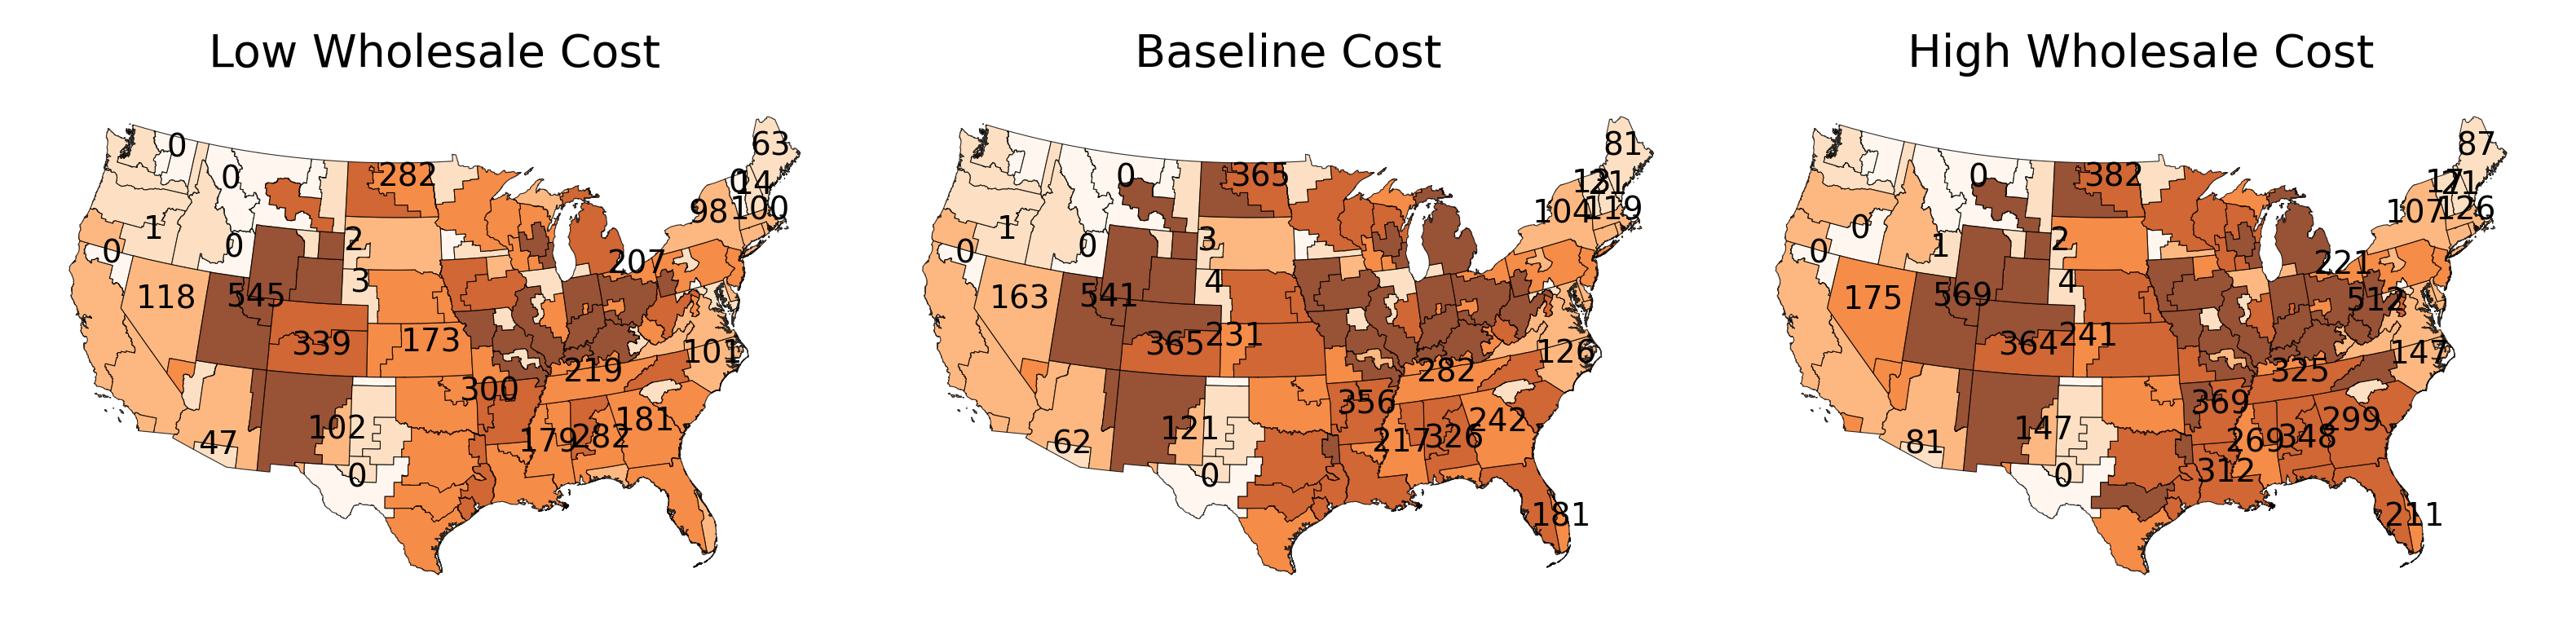

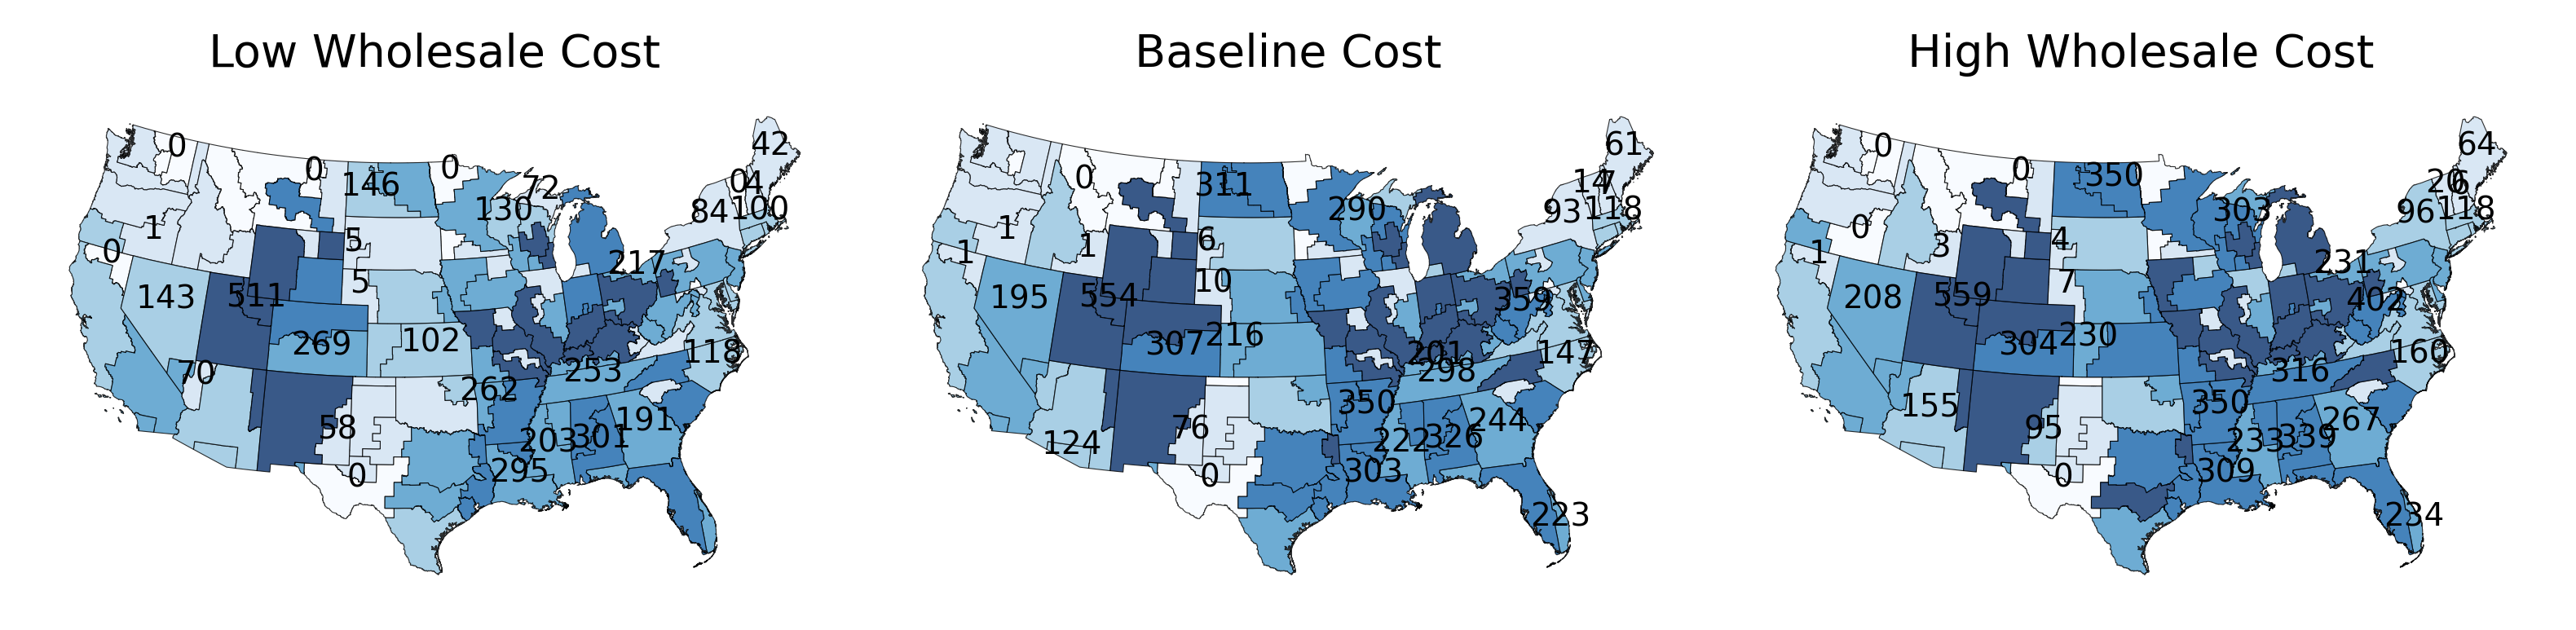

In [4]:
Viz.triple_choropleth(column='lifetime_cambium_co2_rate_avg_mwh',
               tech='pv',
               ascending=True, reverse_cmap=False)

Viz.triple_choropleth(column='lifetime_cambium_co2_rate_avg_mwh',
               tech='wind',
               ascending=True, reverse_cmap=False)

# Viz.triple_choropleth(column='cambium_co2_rate_marginal_sum',
#                tech='pv',
#                ascending=True, reverse_cmap=False)

# Viz.triple_choropleth(column='cambium_co2_rate_marginal_sum',
#                tech='wind',
#                ascending=True, reverse_cmap=False)

NameError: name 'scenario_df' is not defined

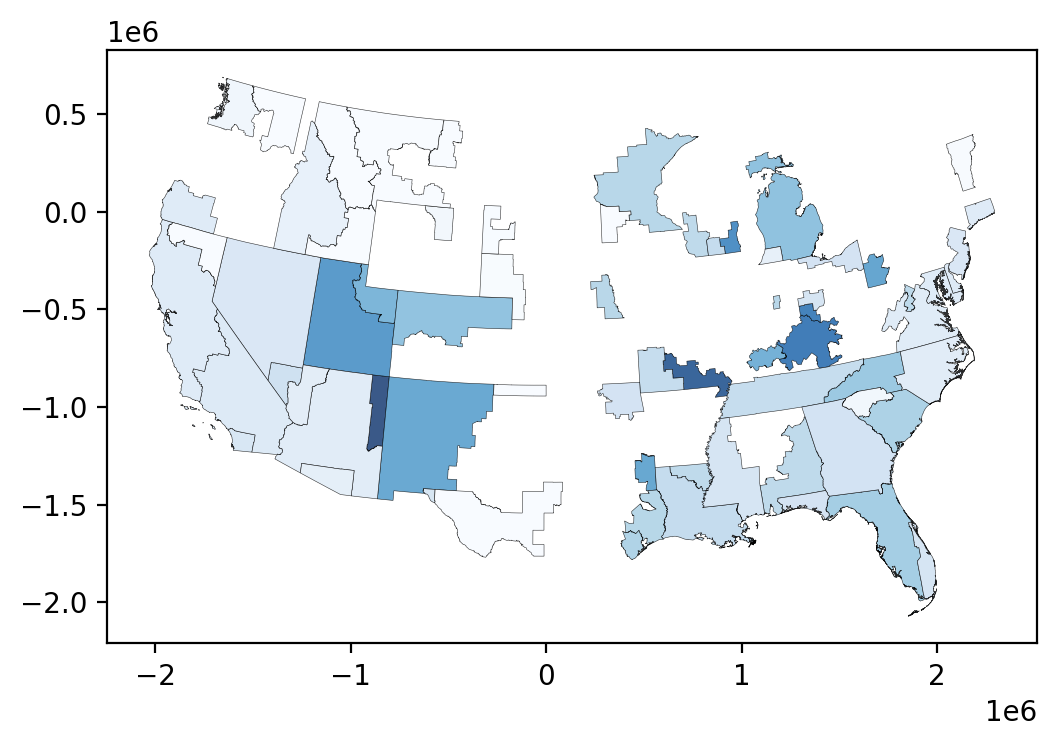

In [5]:
Viz.merged_choropleth(column='lifetime_cambium_co2_rate_avg_mwh', scenario='StdScen20_MidCase', region_label_pct=0.25)

In [3]:
plot_df['scenario']

0        StdScen20_LowRECost
1        StdScen20_LowRECost
2        StdScen20_LowRECost
3          StdScen20_MidCase
4          StdScen20_MidCase
                ...         
6403    StdScen20_HighRECost
6404    StdScen20_HighRECost
6405    StdScen20_HighRECost
6406    StdScen20_HighRECost
6407    StdScen20_HighRECost
Name: scenario, Length: 6408, dtype: object

In [9]:
[i for i in plot_df.columns if 'system_capacity' in i]

['system_capacity']

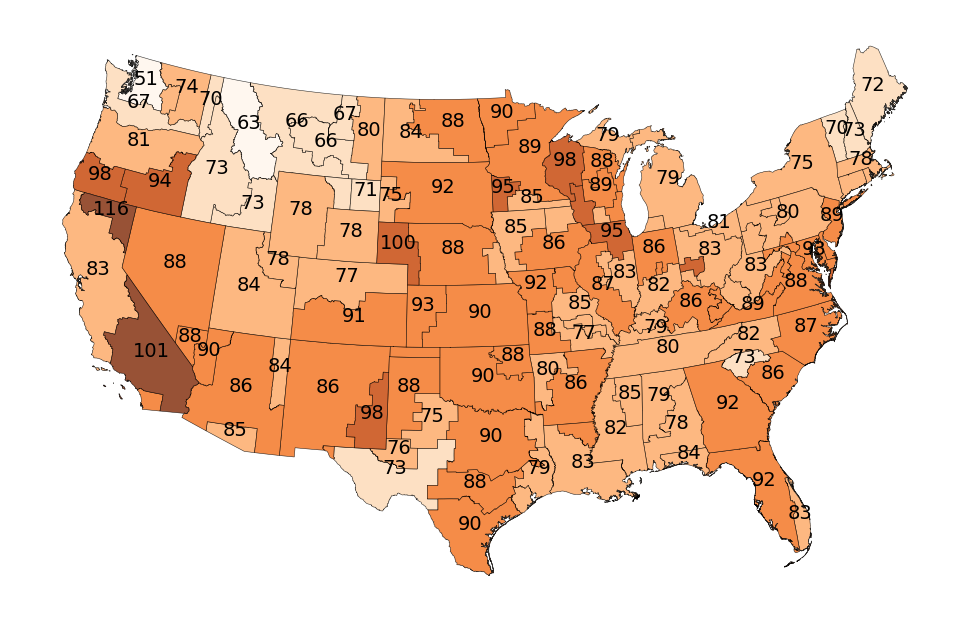

In [4]:
Viz.choropleth(column='lifetime_cambium_grid_value', scenario='StdScen20_MidCase', 
               tech="pv", ascending=True, reverse_cmap=False)

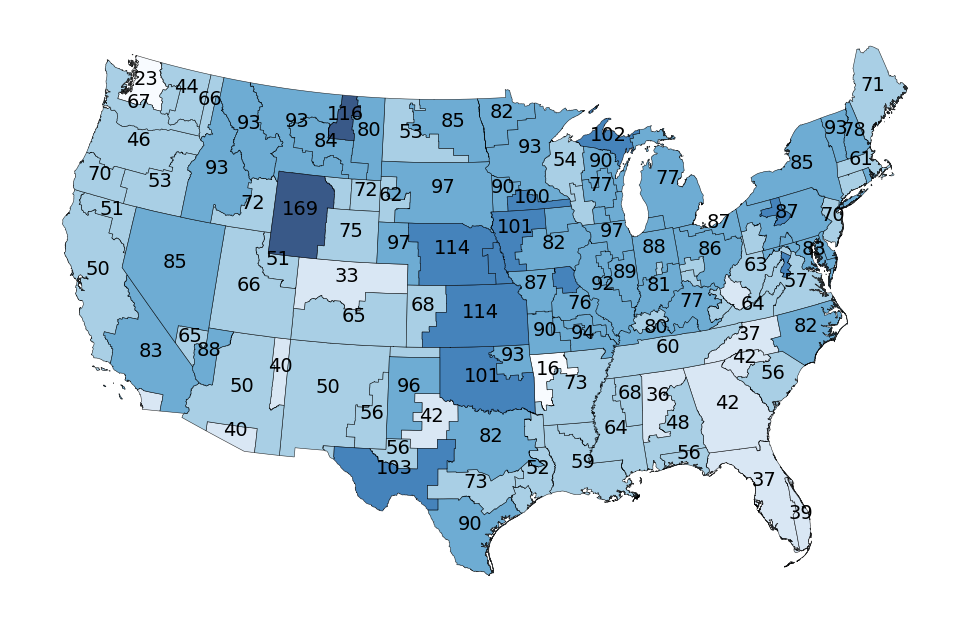

In [5]:
Viz.choropleth(column='lifetime_cambium_grid_value', scenario='StdScen20_MidCase', 
               tech="wind", ascending=True, reverse_cmap=False)

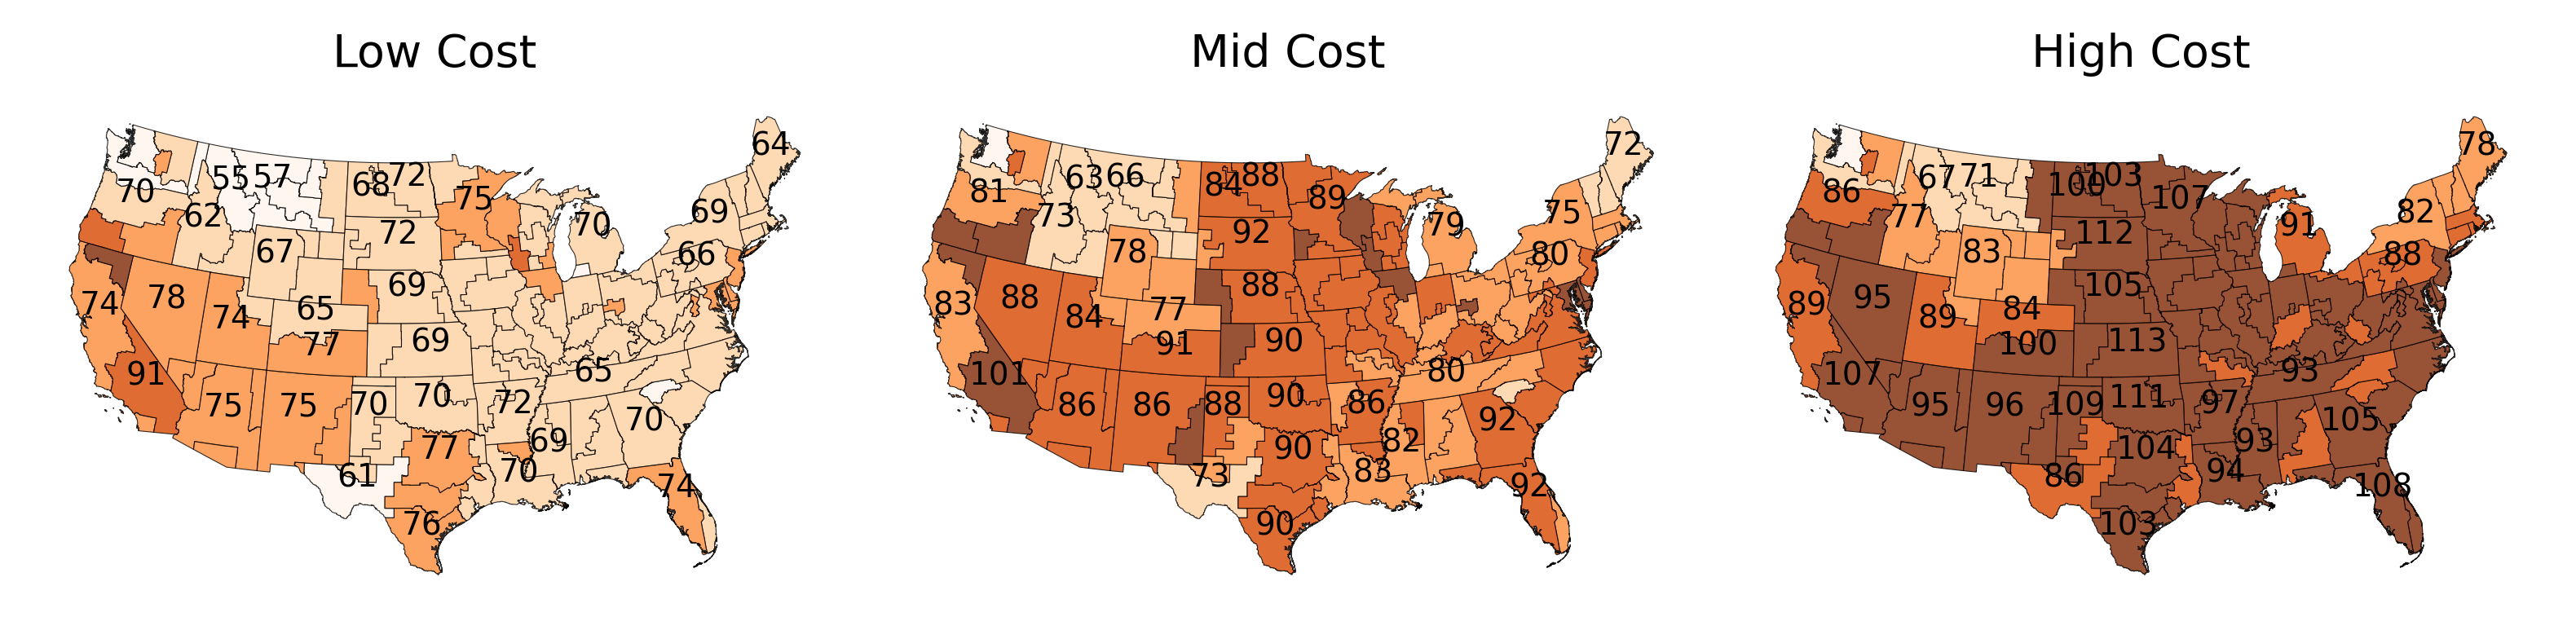

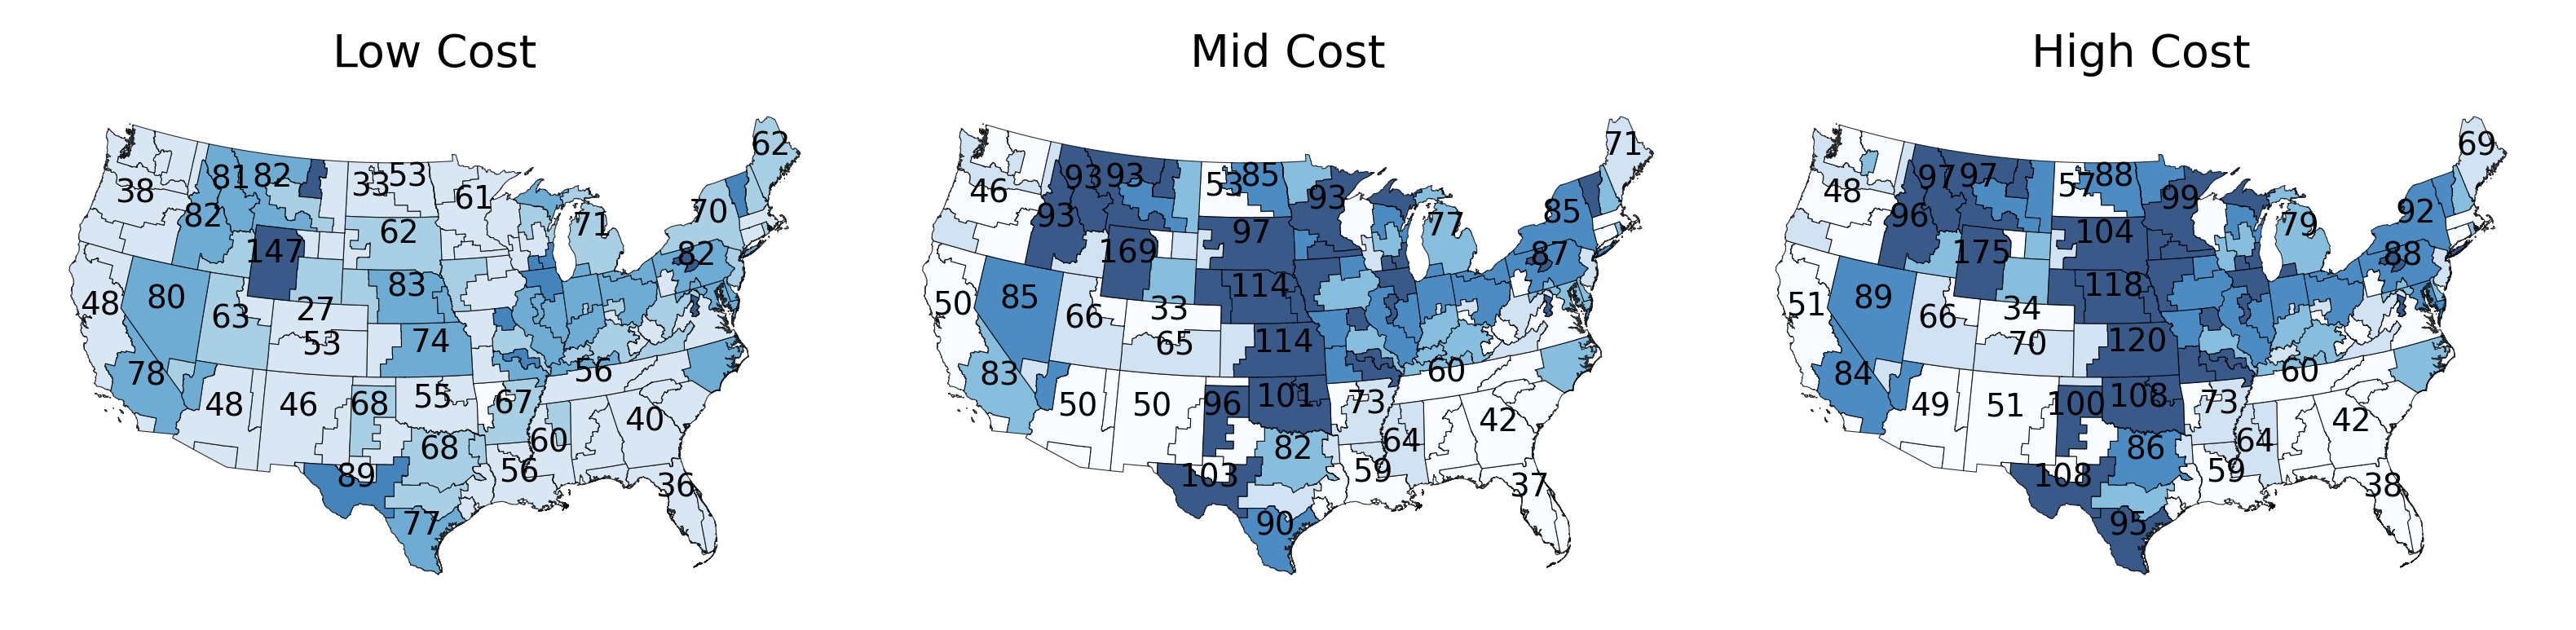

In [9]:
Viz.triple_choropleth(column='lifetime_cambium_grid_value',
               tech='pv',
               ascending=True, reverse_cmap=False)

Viz.triple_choropleth(column='lifetime_cambium_grid_value',
               tech='wind',
               ascending=True, reverse_cmap=False)